In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint
from matplotlib import ticker, cm
from simple_pid import PID
import GPy

In [6]:
def bioreactor_ss_equations(x, sp):
    
    mu_max = 0.5
    Ks = 0.2
    Yxs = 0.5
    si = 20
    
    cells_conc = sp
    s, D = x
    
    mu = ((mu_max*s)/(Ks + s)) 
    
    df = [
        mu - D,
        D*si - D*s - ((mu * cells_conc)/(Yxs))
        
    ]
    
    return df
    

In [7]:
def bioreactor_obj(sp, x0):
    
    cells_conc = sp
    s, D = optimize.fsolve(bioreactor_ss_equations, x0 = x0, args = sp)
    
    x0 = [s,D]
    
    
    return D * cells_conc, x0, D
    
    

In [8]:
res = optimize.fsolve(bioreactor_ss_equations, x0 = [1, 1], args = 3)

In [9]:
res

array([14.        ,  0.49295775])

In [10]:
obj = []
D_vals = []
x = np.linspace(0,12,1000)
x0 = [1,1]
for sp in x:
    
    val, x0, D = bioreactor_obj(sp,x0)
    obj.append(val)
    D_vals.append(D)


 C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
 C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


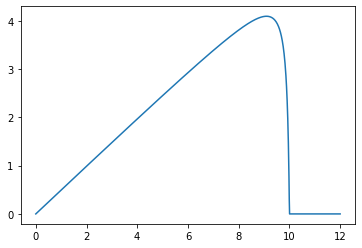

In [11]:
plt.plot(x, obj)